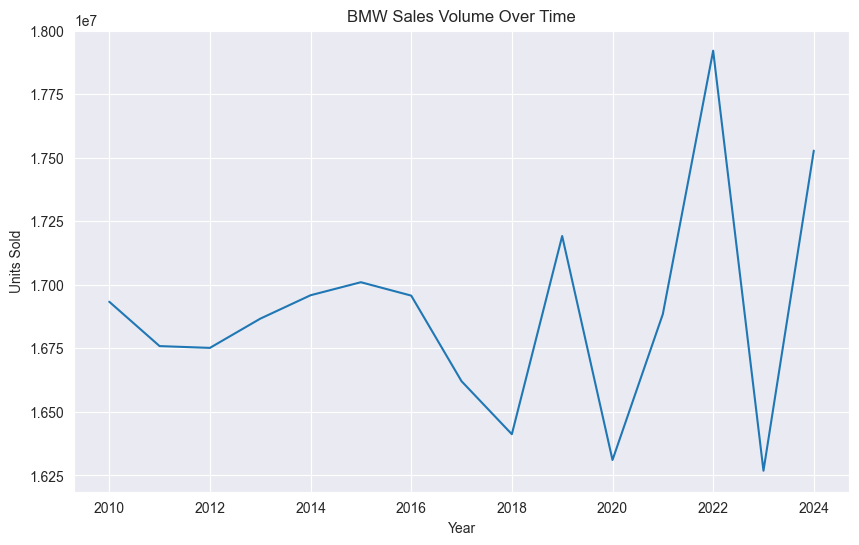

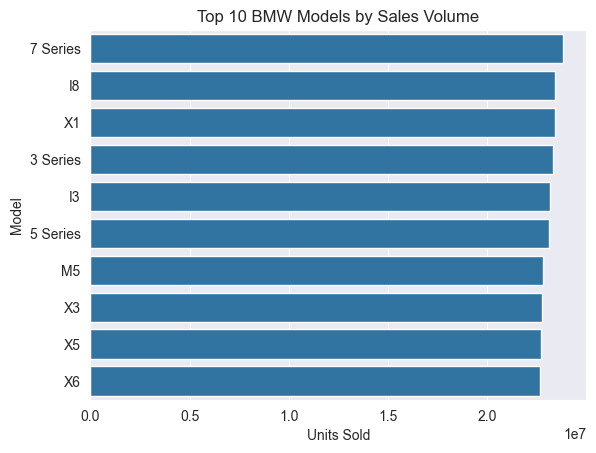

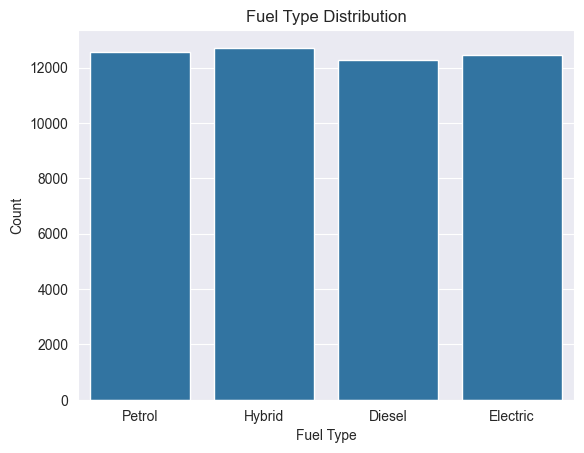

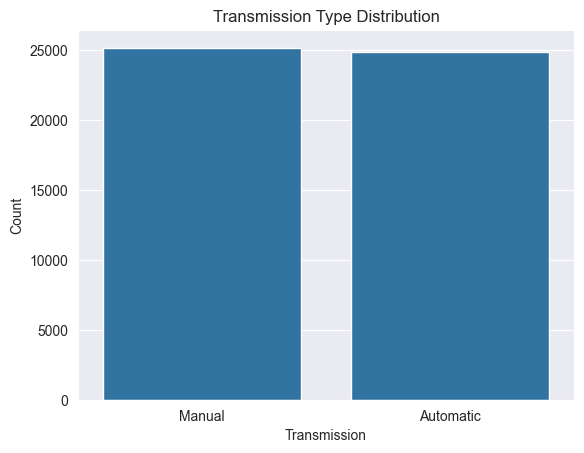

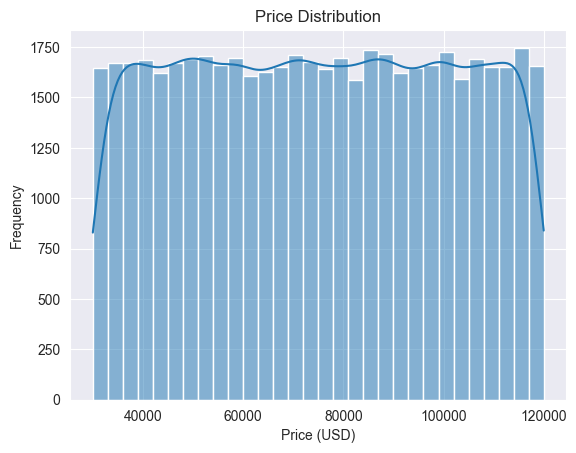

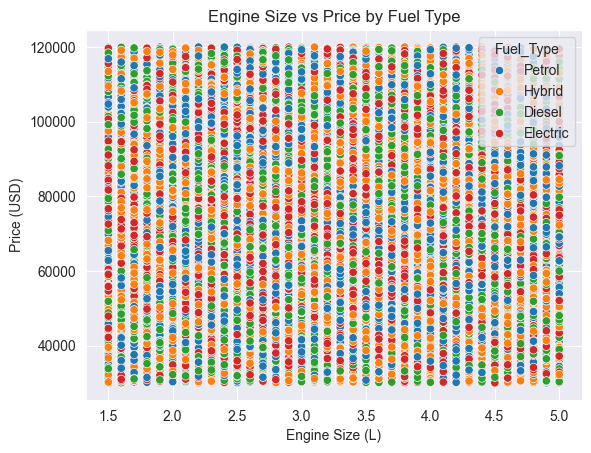

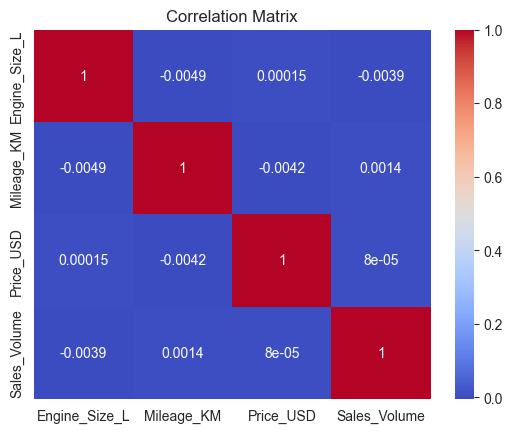

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(f"BMW sales data (2010-2024) (1).csv")
df.columns = df.columns.str.strip()
df.drop_duplicates(inplace=True)

# Format columns
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Fuel_Type'] = df['Fuel_Type'].str.title()
df['Transmission'] = df['Transmission'].str.title()
df['Model'] = df['Model'].str.title()

# Sales Over Time
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Sales_Volume', data=df, estimator='sum', errorbar=None)
plt.title("BMW Sales Volume Over Time")
plt.ylabel("Units Sold")
plt.xlabel("Year")
plt.grid(True)
plt.show()

# Top 10 Models
top_models = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_models.values, y=top_models.index)
plt.title("Top 10 BMW Models by Sales Volume")
plt.xlabel("Units Sold")
plt.ylabel("Model")
plt.show()

# Fuel Type Distribution
sns.countplot(x='Fuel_Type', data=df)
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

# Transmission Type Distribution
sns.countplot(x='Transmission', data=df)
plt.title("Transmission Type Distribution")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()

# Price Distribution
sns.histplot(df['Price_USD'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

# Engine Size vs Price
sns.scatterplot(x='Engine_Size_L', y='Price_USD', hue='Fuel_Type', data=df)
plt.title("Engine Size vs Price by Fuel Type")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price (USD)")
plt.show()

# Correlation Heatmap
corr = df[['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
